In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
l=load_iris()

In [3]:
l.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
l.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
df = pd.DataFrame(data=l.data, columns=l.feature_names)
df['target'] = l.target

In [6]:
x=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
y=df['target']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn=KNeighborsClassifier()

In [10]:
from sklearn.model_selection import GridSearchCV
para_g={'n_neighbors':[1,2,5,10],'n_jobs':[1,3,5]}

In [11]:
gsc=GridSearchCV(estimator=knn,param_grid=para_g,cv=5)

In [12]:
gsc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_jobs': [1, 3, 5], 'n_neighbors': [1, 2, 5, 10]})

In [13]:
gsc.score(x_test,y_test)

1.0

In [14]:
y_pred=gsc.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
cnn=confusion_matrix(y_test,y_pred)

In [17]:
cnn

array([[16,  0,  0],
       [ 0, 16,  0],
       [ 0,  0, 13]])

<Axes: >

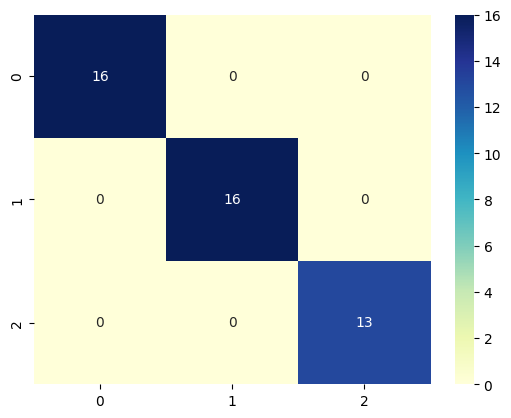

In [18]:
import seaborn as sns
sns.heatmap(cnn,annot=True,cmap='YlGnBu')